# Computer Simulations for Philosophy, Politics and Economics

Spring 2021<br/>
Eric Pacuit <br/>
epacuit@umd.edu <br/>
University of Maryland<br/>



## Agent-based simulations

* Schelling's Model of Segregation
* Iterated Prisoner's Dilemma
* Opinion Dynamics: Hegselmann-Krause Model 
* Deliberation and Polarization
* Epistemic Democracy and the Condorcet Jury Theorem
* Simulating Elections 


##  Computational tools 

* Python (we will use Python 3)
* Jupyter Notebooks ([https://jupyter.org/](https://jupyter.org/))
    * Literate programming: Interactive documents (writtend in markdown/LaTeX) explaining the model and the code. 
* Data Science toolkit: scipy, numpy, pandas, ...
* Visualization: matplotlib, seaborn, altair, etc.
* Sharing models: [Colab](https://colab.research.google.com/), [Streamlit](https://www.streamlit.io/), [Voila](https://voila.readthedocs.io/en/stable/index.html),...
* Probabilistic programming: [lea](https://bitbucket.org/piedenis/lea/wiki/Home), [PYRO](http://pyro.ai/)
* Special Packages: [mesa](https://mesa.readthedocs.io/en/master/#), [axelrod](https://axelrod.readthedocs.io/en/stable/), [preflib tools](https://www.preflib.org/)

## Mathematical background

* Networks (Graph Theory)
* Basic Game Theory
* Basic Probability Theory
* Voting Theory


Agent-based simulations are used in many different areas: 

* Ross A. Hammond, [Considerations and Best Practices in Agent-Based Modeling to Inform Policy](https://www.ncbi.nlm.nih.gov/books/NBK305917/), NCBI, 2015.

In this coure, we are focused on simulations used in Philosophy (especially Social Epistemology), Politics  and Economics: 

* Conor Mayo-Wilson and Kevin J.S. Zollman, The Computational Philosophy: Simulation as a Core Philosophical Method. [Preprint](http://philsci-archive.pitt.edu/18100/), 2020.
* J. McKenzie Alexander, The Structural Evolution of Morality. Cambridge University Press, 2007.
* Mostapha Diss and Vincent Merlin (eds.), Evaluating Voting Systems with Probability Models: Essays by and in Honor of William Gehrlein and Dominique Lepelley. Springer, 2021.




0. Mathematical background
1. Explain the model
2. Learn how to code the model
3. Explore the model
4. Evaluate the model




## Netlogo

NetLogo ([https://ccl.northwestern.edu/netlogo/](https://ccl.northwestern.edu/netlogo/)) is a powerful framework for creating agent-based simulations.   It is a programming environment created in Java (although you do not need to know Java to use NetLogo).   

* There is a web version of NetLogo: [http://www.netlogoweb.org/](http://www.netlogoweb.org/)
* With NetLogo you can quickly create an agent-based model with animation (e.g., see the [Schelling Model of Segregation](http://www.netlogoweb.org/launch#http://ccl.northwestern.edu/netlogo/models/models/Sample%20Models/Social%20Science/Segregation.nlogo)) 
* There are a number of books written about NetLogo:
    * Uri Wilensky and William Rand, [An Introduction to Agent-Based Modeling: Modeling Natural, Social, and Engineered Complex Systems with NetLogo](https://www.amazon.com/Introduction-Agent-Based-Modeling-Natural-Engineered/dp/0262731894/ref=sr_1_4?dchild=1&keywords=agent+based+modeling&qid=1611489846&sr=8-4), The MIT Press, 2015.
    * Steven F. Railsback and Volker Grimm, [Agent-Based and Individual-Based Modeling: A Practical Introduction](https://www.amazon.com/Agent-Based-Individual-Based-Modeling-Practical-Introduction/dp/0691190836/ref=sr_1_3?dchild=1&keywords=agent+based+modeling&qid=1611489846&sr=8-3), Princeton University Press; 2nd edition (March 26, 2019).


## Why not Netlogo? 

* Netlogo is its own programming language with its own quirks
* Python is a standard tool used in AI, machine learning, and data science 
* Access to powerful packages for scientific and mathematical computing (scipy, numpy, etc.)
* Many different options for visualizing and sharing your simulations
* While Netlogo makes animating the model easier, we do not always need to visualize the dynamics of an agent-based model


# Schelling Segregation Model


A famous model due to Thomas Schelling shows how global patterns of spatial segregation can arise from the effect of **homophily** operating at a local level.

**Homophily** is the principle that we tend to be similar to our friends and/or neighbors.

T. Schelling. Dynamic models of segregation. The Journal of Mathematical Sociology, 1(2), 143-186, 1971.

See also,
* J. M. Sakoda, The checkerboard model of social interaction. The Journalof Mathematical Sociology 1(1), 119-132, 1971.

* R. Hegselmann, Thomas C. Schelling and James M. Sakoda: The intellectual, technical, and social history of a model. Journal of Artificial Societies and Social Simulation 20 (3), 2017.




There are two components of the Schelling model: 

1. A network representing different locations
2. A set of agents with two properties: 
    1. The agent type (e.g., 'red' or 'blue')
    2. The current position of the agent in the network


In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
grid = nx.grid_2d_graph(3,3)
color_map=list()
for node in grid:
    color_map.append('blue' if random.random() < 0.5 else 'red')
pos = nx.spring_layout(grid, iterations=100)
nx.draw(grid, pos, node_color=color_map, node_size=500, font_color='white', width=2, lw=1.5, with_labels=False)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## Dynamics

At each round: 

1. For each agent $a$, determine the number of neighbors that are of the same type. 
2. Agent $a$ is happy if the number of similar agents is above a fixed threshold. 
3. If $a$ is not happy, then $a$  moves to an empty location.

Continue that process for a fixed number of rounds or until every agent is happy. 

## Questions

* How many agents are there? 
* What is the structure of the network? 
* How do you determine the neighbors of an agent? 
* Is the homophily threshold the same for all agents? 
* How densely populated is the network (how many free locations are there)?


[NetLogo Schelling Simulation](http://www.netlogoweb.org/launch#http://ccl.northwestern.edu/netlogo/models/models/Sample%20Models/Social%20Science/Segregation.nlogo)
 

# Implementing Schelling's Model using Python in Mesa 

## A Brief Introduction to Python (as needed)

> Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms. ([https://docs.python.org/3/tutorial/](https://docs.python.org/3/tutorial/))

* You don't need to understand everything at this stage!   
* Python is an interpretted language. 
* Python is dynamically typed.


In [229]:
x = "hello"
print(x)
#print(x + " world")

x = 7
print(x)
#print(x + " world")


hello
7


## Tutorials on Python

1. [https://developers.google.com/edu/python/](https://developers.google.com/edu/python/)

2. [http://pythontutor.com/](http://pythontutor.com/)


## Mesa

[https://mesa.readthedocs.io/en/master/](https://mesa.readthedocs.io/en/master/)

In [232]:
from mesa import  Agent

class SchellingAgent(Agent):
    '''
    Schelling segregation agent
    '''
    def __init__(self, pos, agent_type):
        '''
         Create a new Schelling agent.

         Args:
            pos: Agent initial location.
            agent_type: Indicator for the agent's type (minority=1, majority=0)
        '''
        self.pos = pos
        self.type = agent_type
    
    def step(self):
        print("Inside step function. Agent type is ", self.type)

a=SchellingAgent((0,0),1)
print(a.type)
print(a.pos)
a.step()

1
(0, 0)
Inside step function. Agent type is  1


In [233]:
a = SchellingAgent((0,0), 1)
b = SchellingAgent((0,1), 0)

print(a)
print(a.pos)
print(a.type)
a.step()

print("\n")
print(b)
print(b.pos)
print(b.type)
b.step()

(0, 0)
1
Inside step function. Agent type is  1


(0, 1)
0
Inside step function. Agent type is  0


In [237]:
from mesa import Model, Agent

class SchellingAgent(Agent):
    '''
    Schelling segregation agent
    '''
    def __init__(self, pos, model, agent_type):
        '''
         Create a new Schelling agent.
         Args:
            pos: Agent initial location.
            agent_type: Indicator for the agent's type (minority=1, majority=0)
        '''
        super().__init__(pos, model)
        self.pos = pos
        self.type = agent_type

    def step(self):
        similar = 0
        neighbors = self.model.grid.neighbor_iter(self.pos)
        for neighbor in neighbors:
            if neighbor.type == self.type:
                similar += 1

        # If unhappy, move:
        if similar < self.model.homophily:
            self.model.grid.move_to_empty(self)
        else:
            self.model.happy += 1


In [238]:
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector

class SchellingModel(Model):
    '''
    Model class for the Schelling segregation model.
    '''
    def __init__(self, height, width, density, minority_percent, homophily):

        self.height = height
        self.width = width
        self.density = density
        self.minority_percent = minority_percent
        self.homophily = homophily

        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(height, width, torus=True)

        self.happy = 0
        self.datacollector = DataCollector(
            {"happy": lambda m: m.happy},  # Model-level count of happy agents
            # For testing purposes, agent's individual x and y
            {"x": lambda a: a.pos[0], "y": lambda a: a.pos[1]})
        self.running = True
        # Set up agents
        for cell in self.grid.coord_iter():
            #print(cell)
            _,x,y = cell
            if random.random() < self.density:
                if random.random() < self.minority_percent:
                    agent_type = 1
                else:
                    agent_type = 0
                agent = SchellingAgent((x, y), self, agent_type)
                self.grid.position_agent(agent, (x, y))
                self.schedule.add(agent)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        self.happy = 0  # Reset counter of happy agents
        self.schedule.step()
        self.datacollector.collect(self)
        if self.happy == self.schedule.get_agent_count():
            self.running = False


Instatiate a model instance: a 10x10 grid, with an 10% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [239]:
height, width = 10, 10
density = 0.1
minority_percent = 0.2
homophily = 4
model = SchellingModel(height, width, density, minority_percent, homophily)
for a in model.schedule.agents: 
    print("Unique id ", a.unique_id)
    print("Type ", a.type)
    print("Pos ", a.pos)


Unique id  (0, 6)
Type  0
Pos  (5, 9)
Unique id  (0, 7)
Type  0
Pos  (3, 8)
Unique id  (1, 3)
Type  0
Pos  (8, 6)
Unique id  (2, 0)
Type  0
Pos  (3, 3)
Unique id  (2, 6)
Type  0
Pos  (8, 5)
Unique id  (4, 4)
Type  1
Pos  (1, 4)
Unique id  (5, 6)
Type  0
Pos  (0, 3)
Unique id  (5, 8)
Type  0
Pos  (6, 2)
Unique id  (6, 0)
Type  1
Pos  (5, 3)
Unique id  (6, 8)
Type  1
Pos  (8, 7)
Unique id  (7, 2)
Type  0
Pos  (3, 6)
Unique id  (7, 7)
Type  0
Pos  (4, 1)
Unique id  (7, 9)
Type  1
Pos  (8, 8)
Unique id  (8, 2)
Type  1
Pos  (4, 8)
Unique id  (9, 5)
Type  1
Pos  (0, 2)


Instatiate a model instance: a 10x10 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.  Run the model at most 100 times. 

In [251]:
height, width = 50, 50
density = 0.8
minority_percent = 0.3
homophily = 4
model = SchellingModel(height, width, density, minority_percent, homophily)

while model.running and model.schedule.steps < 1000:
    model.step()
print(f"The model ran for {model.schedule.steps} steps") # Show how many steps have actually run

The model ran for 291 steps


The DataCollector object checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [252]:
model_out = model.datacollector.get_model_vars_dataframe()

model_out.head()



,happy
0,1115
1,1379
2,1524
3,1639
4,1709


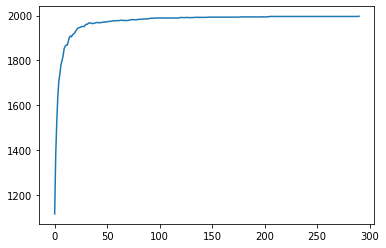

In [253]:
model_out.happy.plot();

## Visualization

In [254]:
from mesa.visualization.modules import CanvasGrid, ChartModule
from mesa.visualization.ModularVisualization import ModularServer


def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "Layer": 0,
                 "Color": "red" if agent.type == 0 else "blue",
                 "r": 0.5}
    return portrayal

grid = CanvasGrid(agent_portrayal, 50, 50, 500, 500)
server = ModularServer(SchellingModel,
                       [grid],
                       "SchellingModel Model",
                       {"height":50, 
                        "width":50, 
                        "density":0.6, 
                        "minority_percent": 0.2, 
                        "homophily": 4})
server.port = 8524 # The default
server.launch()


Interface starting at http://127.0.0.1:8524


OSError: [Errno 48] Address already in use

## Exploring the Parameter Space

In [193]:
from mesa.batchrunner import BatchRunner

def get_segregation(model):
    '''
    Find the % of agents that only have neighbors of their same type.
    '''
    segregated_agents = 0
    for agent in model.schedule.agents:
        segregated = True
        for neighbor in model.grid.neighbor_iter(agent.pos):
            if neighbor.type != agent.type:
                segregated = False
                break
        if segregated:
            segregated_agents += 1
    return segregated_agents / model.schedule.get_agent_count()

In [196]:
variable_params = {"homophily": range(1,9)}
fixed_params =  {"height": 10, "width": 10, "density": 0.8, "minority_percent": 0.2} 
model_reporters = {"Segregated_Agents": get_segregation}
param_sweep = BatchRunner(SchellingModel, 
                          variable_params, 
                          fixed_params, 
                          iterations=10, 
                          max_steps=200, 
                          model_reporters=model_reporters)

In [197]:
param_sweep.run_all()

80it [00:19,  4.08it/s] 


In [198]:
df = param_sweep.get_model_vars_dataframe()
df

,homophily,Run,Segregated_Agents,height,width,density,minority_percent
0,1,0,0.166667,10,10,0.8,0.2
1,1,1,0.380952,10,10,0.8,0.2
2,1,2,0.350000,10,10,0.8,0.2
3,1,3,0.282051,10,10,0.8,0.2
4,1,4,0.287500,10,10,0.8,0.2
...,...,...,...,...,...,...,...
75,8,75,0.243902,10,10,0.8,0.2
76,8,76,0.144737,10,10,0.8,0.2
77,8,77,0.312500,10,10,0.8,0.2
78,8,78,0.214286,10,10,0.8,0.2


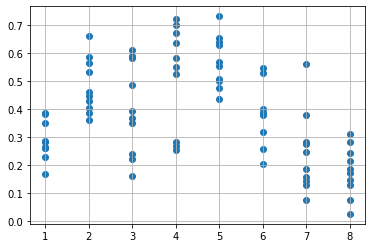

In [199]:
plt.scatter(df.homophily, df.Segregated_Agents)
plt.grid(True)

The Math of Segregation
BY BRIAN HAYES

https://www.americanscientist.org/article/the-math-of-segregation
    
    
An Analysis of One-Dimensional Schelling Segregation
Christina Brandt, Nicole Immorlica, Gautam Kamath, Robert Kleinberg

STOC '12: Proceedings of the forty-fourth annual ACM symposium on Theory of computingMay 2012 Pages 789–804https://doi.org/10.1145/2213977.2214048

    https://arxiv.org/abs/1203.6346